In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

qcTest = QuantumCircuit(2,2)
qcTest.h([0,1])
qcTest.x(0)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# **Basic Quantum Circuit Representation ([LINK](https://qiskit.org/textbook/ch-states/representing-qubit-states.html))**

By representing our circuit we can gleam more information about the results of our work or keep track of how we are constructing things. A house made without a blueprint is a shoddy one!

The first function we will show is the most used one for Quantum Circuit objects:

## **Circuit Representation**
### **Draw Basic**

The draw function gives a drawing of the quantum circuit including all the qubits, bits, gates, instructions, and more.
```
'Circuit Code Name'.draw(output='output type', scale='#', filename='file path', interactive='T/F', reverse_bits='T/F', plot_barriers='T/F', justify='Left, Right, or none',  vertical_compression='Amount of Vertical Compression', fold = '-1/other', initial_state='T/F', idle_wires='T/F'...)
```

Every option above has either defaults or are entirely optional, the most basic example would be just the draw function as shown below:

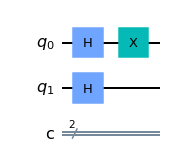

In [2]:
qcTest.draw() # Circuit is created above

As mentioned in Circuit Basics ([LINK](Basics/Circuit_Basics.ipynb)), the qubits are ordered in descending fashion starting from q<sub>0</sub> to q<sub>n</sub> where n is the number of qubits (2 in this case) by default and the classical bits are collated. The gates added to the circuit are represented as squares or rectangles of varying color by default

### **Draw Options**

### Output
Output has many options as listed that are only cosmetic:
- text
- mpl (default)
- latex
- latex_source (for copy pasting elsewhere)

The options are shown below in order:

In [3]:
qcTest.draw(output='text')

┌───┐┌───┐
q_0: ┤ H ├┤ X ├
     ├───┤└───┘
q_1: ┤ H ├─────
     └───┘     
c: 2/══════════

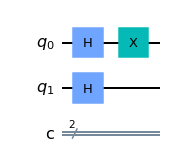

In [4]:
qcTest.draw(output='mpl') # Default

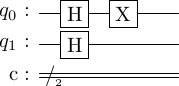

In [5]:
qcTest.draw(output='latex')

In [6]:
qcTest.draw(output='latex_source')

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\gate{\\mathrm{H}} & \\gate{\\mathrm{X}} & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{1} :  } & \\lstick{{q}_{1} :  } & \\gate{\\mathrm{H}} & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{\\mathrm{{c} :  }} & \\lstick{\\mathrm{{c} :  }} & \\lstick{/_{_{2}}} \\cw & \\cw & \\cw & \\cw\\\\\n\\\\ }}\n\\end{document}'

### Scale

Changes the size of the output, options are any float where < 1.0 shrinks and > 1.0 enlarges.

Cannot be used with text output style.

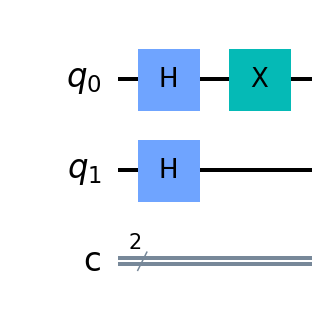

In [7]:
qcTest.draw(scale=2.0)

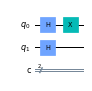

In [8]:
qcTest.draw(scale=0.5)

### File Name

This option saves the file on your computer at ***(NEEDS MORE INFO)***

### Interactive

Makes the drawing a pop out window that can be interacted with (Does not work in IBM Quantum Lab and cannot be used with text or latex_source style options):

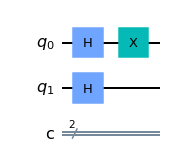

In [9]:
qcTest.draw(interactive=True)

### Reverse Bits

Changes the order of the bits such that they are descending instead of ascending the default is false:

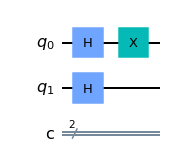

In [10]:
qcTest.draw()

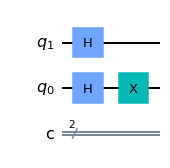

In [11]:
qcTest.draw(reverse_bits=True)

### Plot Barriers

A boolean that controls whether or not barriers are drawn in the circuit drawing, more information about barriers can be found here ([LINK](Basics/Gates_and_Instructions)) in the gates and instructions section. A basic description of barriers is that they are cosmetic and allow you to segment the circuit when drawn.

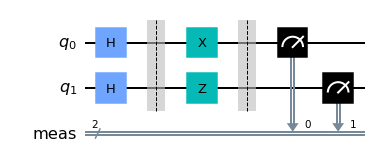

In [12]:
qcBarrier = QuantumCircuit(2)
qcBarrier.h([0,1])
qcBarrier.barrier()
qcBarrier.x(0)
qcBarrier.z(1)
qcBarrier.measure_all()
qcBarrier.draw()

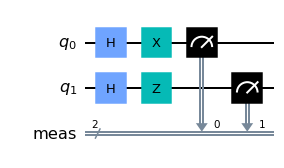

In [13]:
qcBarrier.draw(plot_barriers=False)

### Justify

Changes the visual order of the gates in the drawing where left is default, right aligns them to the right, and none means that no gates are represented at the same time vertically. All cosmetic:

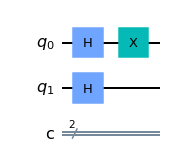

In [14]:
qcTest.draw(justify='left') # Default

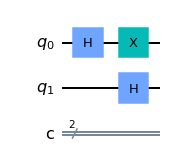

In [15]:
qcTest.draw(justify='right')

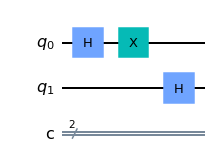

In [16]:
qcTest.draw(justify='none')

### Vertical Compression

Changes how close the lines are in the text style option, options are high, medium, and low:

In [17]:
qcTest.draw(output='text', vertical_compression='low')

┌───┐┌───┐
q_0: ┤ H ├┤ X ├
     └───┘└───┘
     ┌───┤     
q_1: ┤ H ├─────
     └───┘     
               
c: 2/══════════

In [18]:
qcTest.draw(output='text', vertical_compression='medium') #Default

┌───┐┌───┐
q_0: ┤ H ├┤ X ├
     ├───┤└───┘
q_1: ┤ H ├─────
     └───┘     
c: 2/══════════

In [19]:
qcTest.draw(output='text', vertical_compression='high')

┌───┐┌───┐
q_0: ┤ H ├┤ X ├
     ├───┤└───┘
q_1: ┤ H ├─────
     └───┘     
c: 2/══════════

### Fold

When the circuit is too long to fit given its current scale it will continue on the next line at the same scale, by setting fold to '-1' you can prevent this and have it automatically scale so that it fits. In the text option is sets the length of the lines "However, if running in jupyter, the default line length is set to 80 characters. In mpl, it is the number of (visual) layers before folding. Default is 25.":

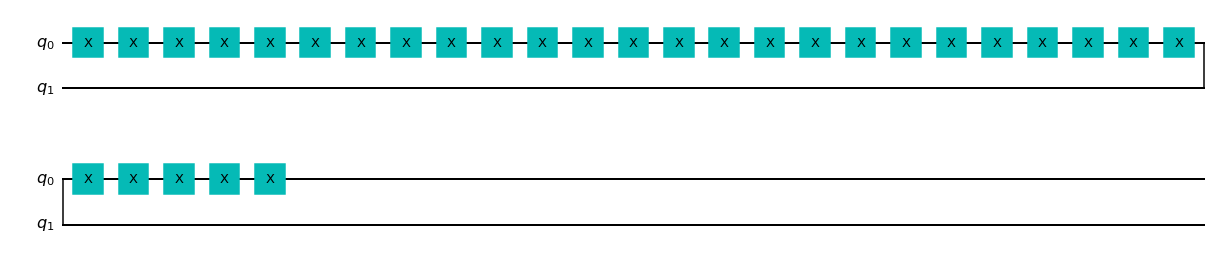

In [20]:
qcLong = QuantumCircuit(2)
for i in range(30):
    qcLong.x(0)
    
qcLong.draw()

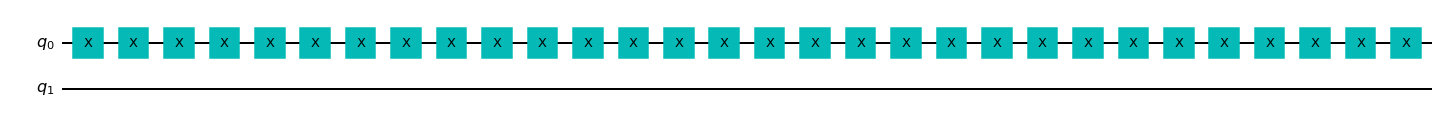

In [21]:
qcLong.draw(fold=-1)

### Initial States

Boolean option that adds notation at the start of the drawing that tells you what state the qubits are in before undergoing modification, I cannot find a way to change the state to something other than all 0's so it is purely cosmetic.

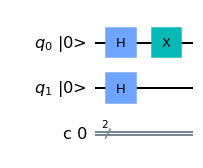

In [22]:
qcTest.draw(initial_state=True)

### Idle Wires

A Boolean that controls whether or not to show wires that are not used, default is True:

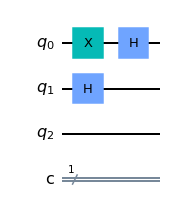

In [23]:
qcUseless = QuantumCircuit(3,1)
qcUseless.x(0)
qcUseless.h([0,1])
qcUseless.draw()

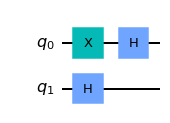

In [24]:
qcUseless.draw(idle_wires=False)

There are more options that are not covered here: ([LINK](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html))

# **Advanced Circuit Representation**

### Style

One complex option not described above uses json dictionaries for precise control over the mpl or latex output styles. More information is needed.

# **State Vector Representation**

### **Important Preface**

State vectors require a different simulator than something like representing the results of measurement, if one swaps simulator, it must swapped back if you want to use it again;  the import and simulator call is as such:

In [25]:
from qiskit import execute # this can be attached to the other imports as such from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
sim = Aer.get_backend('aer_simulator') # The state vector simulator

### Basic Statevector Retrieval and Representation

The most basic way of obtaining and representing a state vector is as such:

In [26]:
backend = QasmSimulator() # Switches the backend to Qasm Simulator, Only one backend can be active at a time

qcState = QuantumCircuit(1)
qcState.h(0) # Sets up a hadamard state

qcState.save_statevector() # Saves the statevector, only one can be saved at a time, essentially runs all the gates and instructions given to circuit at this time

job = execute(qcState, backend) # Next we simulate the state vector
job_result = job.result() # And grab the results that are floating around in the ether

print(job_result.get_statevector(qcState)) # Next we retrieve only what we want from the results, in this case we want the state vector, it will be returned as a statevector but we can still print it as a string

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


The above sets the backend so that we can save / sim the statevector, creates a circuit, hadamards the only qubit, saves the resulting state vector at the time of the code being ran, simulates the statevector, retrieves all of the results from the simulation, then grabs only the resulting state vector and prints it. Now, we will show some options for the state vector object. One can see that the qubit's probabilities when squared equal 0.5 or 50% as expected with no complex component.

### Advanced Statevector Representation ([LINK](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.draw.html#qiskit.quantum_info.Statevector.draw))

From now on the statevector from below will be saved in python data piece called ourStateVector.

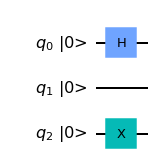

In [27]:
backend = QasmSimulator()

qc = QuantumCircuit(3)
qc.h([0])
qc.x([2])

qc.save_statevector()

job = execute(qc, backend) # Next we simulate the state vector
job_result = job.result() # And grab the results that are floating around in the ether

ourStateVector = job_result.get_statevector(qc)

qc.draw(initial_state=True, plot_barriers=False)

We can draw the statevector using the draw() function (similar to circuit in name but are completley different in composition).

```
'Statevector'.draw(output='Output Style'...)
```

The most important option <sub>if not only</sub> in this draw function is the output stlye similar to QuantumCircuit.draw() (***NEEDS MORE EXPLANATION***)

- repr
- text
- latex
- latex_source
- qsphere
- hinton
- bloch
- city
- paulivec

### repr

The repr output style is a string that is meant to be printed, it is the default of the statevector.draw() method. It includes the type of data it is describing along with the dimensions of the data type, the dimensions is a list of 2 dimensional qubits, if there are five qubits there will be five, 2 dimensional objects in the statevector object. The repr name comes from it referencing a particular part of the statevector object.

In [28]:
print(ourStateVector.draw()) # Default, used for print statement

Statevector([0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


### text

The text style is a nicer looking version of the repr without all of the extraneous information like stating its a statevector or the dimensions.

The format for this is as follows: [complex coefficiant for state 000, 001, 010, 011, 100, 101, 110, 111] (Keep in mind that Qiskit's notation for the order of qubits in drawings is backwards from convention, so altering the first qubit (q<sub>0</sub>) changes the last qubit in the string --> |000> + x.(q<sub>0</sub>) = |001> and that there will be 2<sup>n</sup> possible states where n is the number of qubits)

In [29]:
ourStateVector.draw(output='text')

[0.        +0.j,0.        +0.j,0.        +0.j,0.        +0.j,
 0.70710678+0.j,0.70710678+0.j,0.        +0.j,0.        +0.j]

### latex

The latex option is by far the most attractive option and useful for testing. It follows normal dirac notation, remember that coefficants are squared to find the probabilities.

The reverse order of the qubits is more obvious here,

In [30]:
ourStateVector.draw(output='latex')

<IPython.core.display.Latex object>

### latex_source

This option is for copy pasting the results elsewhere

In [31]:
ourStateVector.draw(output='latex_source')

'\\frac{\\sqrt{2}}{2} |100\\rangle+\\frac{\\sqrt{2}}{2} |101\\rangle'

### qsphere

The rarely showcased qsphere is a visual option for representing the statevector. You can read more about it here! ([LINK](https://quantumcomputing.stackexchange.com/questions/1490/is-qsphere-an-actual-term-representing-5-qubits))

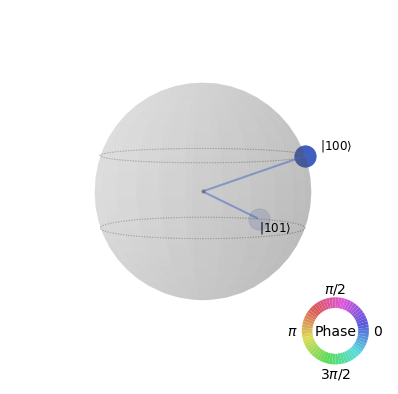

In [32]:
ourStateVector.draw(output='qsphere')

### hinton

The hinton diagram for quantum states is very interesting and I wish I could explain it better but you can probably understand it better than I could explain it by just looking at it, if you would like to learn more, here is a link ([LINK](https://deeplearninguniversity.com/qiskit/qiskit-hinton/))

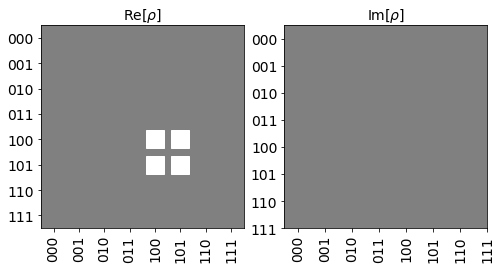

In [33]:
ourStateVector.draw(output='hinton')

### bloch

The bloch sphere is a way to visualize the state of individual qubits in a statevector, the computational basis runs along the z axis and the other basis occupy the x and y axis, by applying a hadamard ghate to qubit 0 we are putting the state in the x basis. (NEED VERIFICATION)

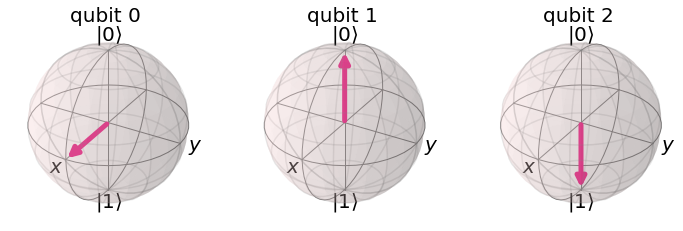

In [34]:
ourStateVector.draw(output='bloch')

### city

The city option is a state city diagram very similar to the hinton diagram, just three dimensional. Instead of displaying probability as size it is height.

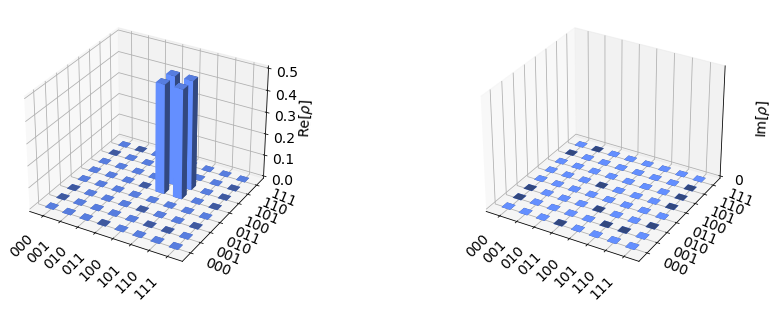

In [35]:
ourStateVector.draw(output='city')

### paulivec

The paulivec plots a mixed state over the pauli matrices. (MORE INFO NEEDED)

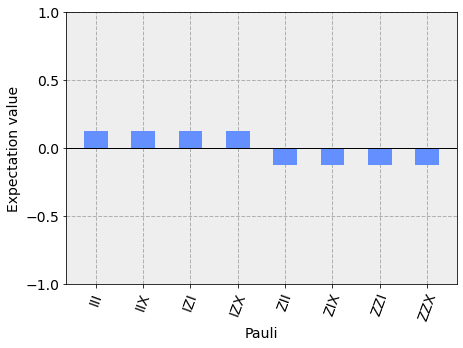

In [36]:
ourStateVector.draw(output='paulivec')

### **Expectation Value**

Given a statevector and an operator we can find the expectation value.

Below shows an example statevector and operator and how to find the expectation value.

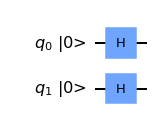

In [37]:
from qiskit.quantum_info.operators import Operator, Pauli # This is for the operator method, discussed in the gates and instructions section

backend = QasmSimulator()

qc = QuantumCircuit(2)
qc.h([0,1])
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])

qc.save_statevector()

job = execute(qc, backend) # Next we simulate the state vector
job_result = job.result() # And grab the results that are floating around in the ether

ourStateVector = job_result.get_statevector(qc)

qc.draw(initial_state=True, plot_barriers=False)

In [38]:
ourStateVector.expectation_value(XX)

(1+0j)